#Reconocimiento de imagenes con tensorflow 2.0

In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals
import os

#Importamos TF2 y keras
import tensorflow as tf
from tensorflow import keras

#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imagenes desde internet usaremos estas librerias
from PIL import Image
import requests
from io import BytesIO

#Lo usaremos para escalar la imagen
import cv2

print(tf.__version__)

2.3.0


# Importaremos el dataset
usaremos 60,000 imagenes para entrenar la red y 10,000 imagenes para evaluar con que precisión aprendió la red para clasificar las imagenes. Podemos acceder al fashion MNIST directamente desde TensorFlow.

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


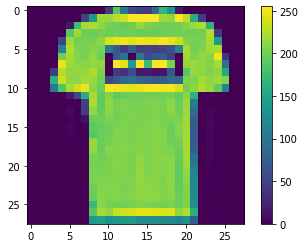

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Las etiquetas son una matriz de enteros, que van de 0 a 9. Estas corresponden a la clase de vestimenta que representa la imagen 

In [ ]:
class_names=['camiseta','pantalon','sueter','vestido','abrigo','sandalia',
             'camisa','zapatilla deportiva','bolso','botines']

#Exploramos datos

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

Son 10,000 imagenes de 28x28

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Esos números en el tensor son las etiquetas de cada foto

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

##Pre prosesamiento de datos

In [ ]:
train_images=train_images/255
test_images=test_images/255

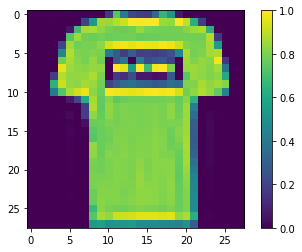

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

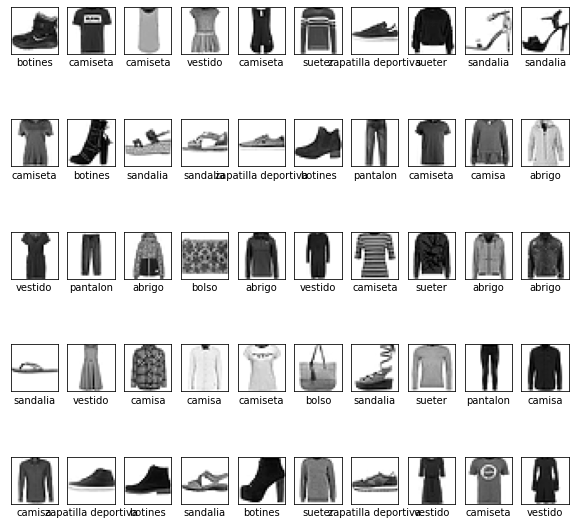

In [ ]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Entrenaremos nuestro modelo

In [ ]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
                        ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


Compilamos el modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_path='checkpoints/check'
cp_callbacks=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)
model.fit(train_images,train_labels,epochs=50,callbacks=[cp_callbacks])

Epoch 1/50
1860/1875 [============================>.] - ETA: 0s - loss: 0.3430 - accuracy: 0.8767
Epoch 00001: saving model to checkpoints/check
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3431 - accuracy: 0.8767
Epoch 2/50
1861/1875 [============================>.] - ETA: 0s - loss: 0.3398 - accuracy: 0.8782
Epoch 00002: saving model to checkpoints/check
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3400 - accuracy: 0.8782
Epoch 3/50
1848/1875 [============================>.] - ETA: 0s - loss: 0.3361 - accuracy: 0.8795
Epoch 00003: saving model to checkpoints/check
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3359 - accuracy: 0.8795
Epoch 4/50
1850/1875 [============================>.] - ETA: 0s - loss: 0.3327 - accuracy: 0.8799
Epoch 00004: saving model to checkpoints/check
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3331 - accuracy: 0.8798
Epoch 5/50
1841/1875 [============================>.] - 

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 888us/step - loss: 0.4235 - accuracy: 0.8472


#Haciendo predicciones

In [ ]:
predictions=model.predict(test_images)

In [ ]:
predictions[0]

array([2.7995768e-06, 4.3537602e-07, 1.1522995e-06, 5.1386894e-07,
       5.0508092e-06, 6.6058978e-02, 7.5066891e-06, 5.3379588e-02,
       1.1144708e-03, 8.7942940e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

#Probemos el modelo con una imagen externa y agena al data set

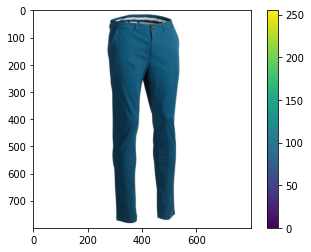

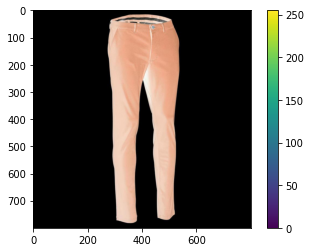

In [ ]:
#Cargamos una imagen a partir de una URL
response=requests.get('https://contents.mediadecathlon.com/p1633882/800x800/sq/pantalon_golf_hombre_petroleo_inesis_golf_8516699_1633882.jpg?k=41a7068fb719f9895b096356ba7717a4')
img=Image.open(BytesIO(response.content))
np_img=np.array(img)

plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.show()
#Invertimos la imagen
np_img=255-np_img
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.show()


In [ ]:
np_img.shape

(800, 800, 3)

In [ ]:
#Vamos a definir una función que me convierta una imagen a color a una imagen de grises
def rgb2gray(rgb):
  return np.dot(rgb[...,:3],[0.333,0.333,0.333])

In [ ]:
bw_image=rgb2gray(np_img)
bw_image.shape

(800, 800)

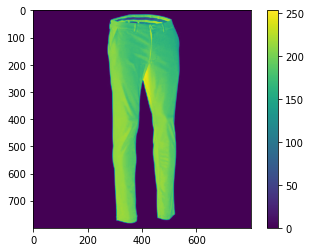

In [ ]:
plt.figure()
plt.imshow(bw_image)
plt.colorbar()
plt.show()


In [ ]:
res=cv2.resize(bw_image,dsize=(28,28),interpolation=cv2.INTER_CUBIC)

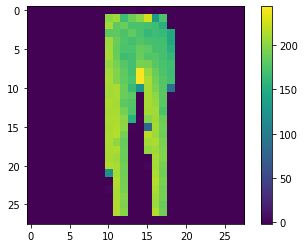

In [ ]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.show()

In [ ]:
res=res/255

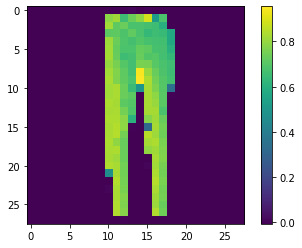

In [ ]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.show()

In [ ]:
x=np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [ ]:
x[0]=np.array(res)

In [ ]:
result=model.predict(x)
result

array([[8.4735066e-06, 9.9996829e-01, 2.9264626e-07, 1.4894275e-05,
        1.2677192e-06, 9.8105150e-13, 9.1448783e-07, 1.5585169e-10,
        5.8853334e-06, 1.2692954e-10]], dtype=float32)

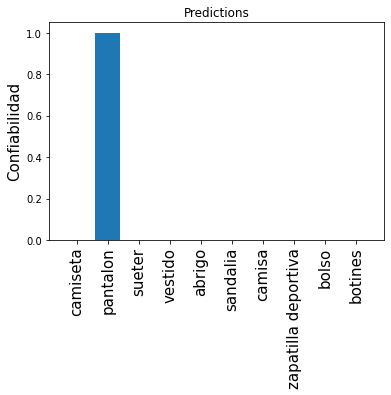

In [ ]:
index=np.arange(len(class_names))
plt.bar(index,result[0])
plt.ylabel('Confiabilidad',fontsize=15)
plt.xticks(index,class_names,fontsize=15,rotation=90)
plt.title('Predictions')
plt.show()